In [3]:
import argparse
import os
import loguru
import keras_cv
import tensorflow as tf
from tensorflow import keras
from keras_cv import bounding_box
from keras_cv import visualization
import yaml
from tensorflow.keras.utils import plot_model

class StaticDotDict(dict):
    """
    a dictionary that supports dot notation 
    as well as dictionary access notation 
    usage: d = DotDict() or d = DotDict({'val1':'first'})
    set attributes: d.val2 = 'second' or d['val2'] = 'second'
    get attributes: d.val2 or d['val2']
    static mean that the dict is not dynamic, i.e. you can't add new attributes to it
    """
    __getattr__ = dict.__getitem__
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

    def __init__(self, dct):
        for key, value in dct.items():
            if hasattr(value, 'keys'):
                value = StaticDotDict(value)
            self[key] = value

print = loguru.logger.debug

In [4]:
class YOLOv8Trainer:
    def __init__(self, config_file):
        self.config_file = config_file
        self.config = self.arg_parse()

    def arg_parse(self):
        with open(self.config_file, 'r') as f:
            config = yaml.safe_load(f)
        config = StaticDotDict(config)
        return config

    def configure_model(self):
        self.backbone = keras_cv.models.YOLOV8Backbone.from_preset(self.config.model.backbone)
        yolo_v8_model = keras_cv.models.YOLOV8Detector(
            backbone=self.backbone,
            num_classes=len(self.config.model.classes),
            bounding_box_format=self.config.model.bounding_box_format,
            fpn_depth=self.config.model.fpn_depth,
        )
        self.model = yolo_v8_model
        
    def configure_optimizer(self):
        raise NotImplementedError

    def configure_callback(self):
        raise NotImplementedError

    def configure_trainer(self):
        raise NotImplementedError

    def visualize_dataset(self):
        raise NotImplementedError



trainer = YOLOv8Trainer('../config.yaml')

In [5]:
trainer.configure_model()

2023-08-23 03:05:55.777075: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55db08615610 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
2023-08-23 03:05:55.777117: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): TPU, 2a886c8
2023-08-23 03:05:55.777129: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): TPU, 2a886c8
2023-08-23 03:05:55.777139: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): TPU, 2a886c8
2023-08-23 03:05:55.777149: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (3): TPU, 2a886c8
2023-08-23 03:05:55.777160: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (4): TPU, 2a886c8
2023-08-23 03:05:55.777170: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (5): TPU, 2a886c8
2023-08-23 03:05:55.777180: I tensorflow/compiler/xla/service/service.cc:176]   StreamEx

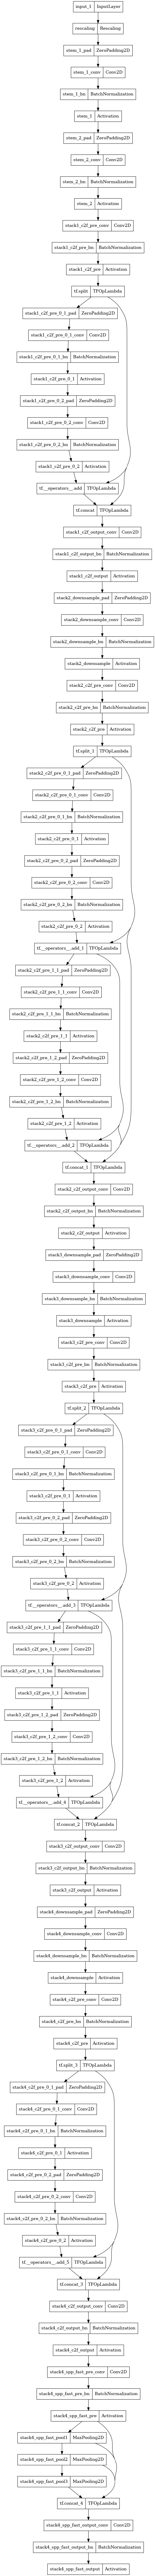

In [6]:
plot_model(trainer.backbone) 

In [8]:
trainer.model.summary()

Model: "yolov8_detector"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 model (Functional)          {'P3': (None, None, None,    1277680   ['input_2[0][0]']             
                             64),                                                                 
                              'P4': (None, None, None,                                            
                             128),                                                                
                              'P5': (None, None, None,                                            
                             256)}                                                  

In [9]:
trainer.configure_model()

In [29]:
trainer.config

{'model': {'backbone': 'yolo_v8_xs_backbone_coco',
  'classes': ['person', 'dog', 'cat'],
  'fpn_depth': 2,
  'bounding_box_format': 'xywh'},
 'dataset': {'dataset_path': None, 'type': None, 'val_split': None},
 'accelerator': 'tpu'}

In [5]:
from modules import YOLOv8Trainer

ModuleNotFoundError: No module named 'modules'

In [8]:
import sys
sys.path.append('../')

In [10]:
from modules import YOLOv8Trainer, XMLDataset
